# Lecture 1 - Introduction and software install
## ECE398 - Programming Methods for Machine Learning
### Created by Alexander Schwing and Yun-Sheng Chen in Fall 2021; Taught by Aiguo Han in Spring 2022

Goals of this lecture:
- Introduction
- Software installation
- Examples
- Organizational details

## Introduction

### Your instructor
- Aiguo Han, Research Assistant Professor in ECE
- E-mail: han51@illinois.edu
- Office: 2058 ECEB
- Website: https://aiguohan.github.io/

### Discuss with your class mates

- Introduce yourself
- What do you know about deep learning
- what can deep learning be used for
- where have you used deep learning

### Share experience in class

### Welcome to ECE398 - Programming Methods for Machine Learning

In this course you will:

* Get to know linear algebra using Python
* Fit linear functions using auto-differentiation
* Build complex neural/deep networks
* Use distributed systems for faster training
* Extend Pytorch with custom functions

We will use PyTorch which is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab.

We use PyTorch to: 
- Quickly protype complex neural networks
- Do fast auto-gradient computations 
- Utilize known ML corpora/models 

## Software installation

### To use PyTorch, you will need a Python environment. You can install Python with: 

- Anaconda - a Python distribution aimed at package management which installs many packages directly (https://www.anaconda.com/products/individual)
- Miniconda - another Python package manager which only installs the minimum number of necessary packages (https://docs.conda.io/en/latest/miniconda.html)

Which one? https://docs.conda.io/projects/conda/en/latest/user-guide/install/download.html#anaconda-or-miniconda

- Using a Unix software manager (brew, apt-get, yum, etc.)

- Direct download from the website. 

How to use conda:
- Check the conda cheat sheet: 
    * https://conda.io/projects/conda/en/latest/user-guide/getting-started.html#starting-conda 
    * https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf
    
Typically:
- create an environment with ```$ conda create --name {EnvironmentName} python=3.8.8```
- activate the environment with ```$ conda activate {EnvironmentName}```
- deactivate the environment when done with ```$ conda deactivate```

Verify your Python installation (after activating the environment) by typing: 

``` $ python --version ``` 
or ``` $ python -V ``` 

in the command line. You should get:

``` Python 3.8.8 ```

Using Python3 in this course. 

To check which python you are using you may type

``` $ which python ```

which should point you to the current python executable that you will use.

If you are using a Windows system, type 

``` $ where.exe python ```

### Install Python libraries
Pip is the Python Packaging Authority’s recommended tool for installing packages. <br>
Conda is a cross platform package and environment manager that installs and manages conda packages from the Anaconda repository. <br> 
You may check here (https://www.anaconda.com/blog/understanding-conda-and-pip) for the differnce between conda and pip<br>

You can use ``` conda install ``` or ```pip3``` to install python libraries. Here are examples using Conda 

- To install numpy: ``` $ conda install numpy ```
- To install matplotlib: ``` $ conda install matplotlib ```
- To install pytorch: ``` $ conda install pytorch torchvision torchaudio -c pytorch ```

To install specific versions (used in this course):
- ``` $ conda install numpy==1.20.2 ```
- ``` $ conda install pytorch==1.9.0 torchvision==0.10.0 torchaudio==0.9.0 -c pytorch ```

To start an interactive python environment type ``` $ python ```

Within the interactive python environment you can load numpy or pytorch via

In [1]:
import numpy as np
print(np.__version__)

1.20.2


In [2]:
import torch
print(torch.__version__)

1.9.0


### Coding environments

- You can use any IDE (integrated development environment) you are most comfortable with (such as VSCode, PyCharm). 
- Class slides/notes consist of Jupyter notebooks
- Highly recommend using Jupyter notebooks for code development
    - Run Jupyter notebooks locally using Anaconda/Miniconda (``` $ conda install -c conda-forge notebook ``` or ``` $ conda install -c conda-forge jupyterlab ```)
    - Run notebooks remotely using Google Colab
- Highly recommend using Git for saving/sharing work. (https://docs.qubole.com/en/latest/user-guide/notebooks-and-dashboards/notebooks/jupyter-notebooks/managing-jupy-notebook-versions/link-jupy-notebook-github.html#push-commit-jupy)

### Jupyter notebook demonstration (on Google colab)

- http://colab.research.google.com (provides access to GPUs and TPUs)

## Examples

### Datasets

PyTorch has a lot of public datasets (some of which we will use in this class): 

In [3]:
from torchvision import datasets, transforms

In [6]:
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
dataset1 = datasets.MNIST('../data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=9)

In [7]:
# get some random training images
dataiter = iter(train_loader)
images,labels = dataiter.next()

Label:0


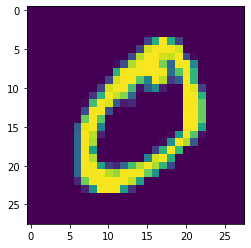

In [8]:
import matplotlib.pyplot as plt
#dataloader outputs 4D tensor [batch,channel,heaight,width]
plt.imshow(np.transpose(images[1].numpy(), (1,2,0))) 
print('Label:' + str(labels[1].numpy()))

### Deep Learning

We will also get to learn how to train and use deep learning models.

**Example from a later class**

In [13]:
import torch
model = torch.hub.load('pytorch/vision', 'resnet18', pretrained=True)

# If the above code does not work, use the following hack fix
# import torchvision
# model = torchvision.models.resnet18(pretrained=True, progress=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\aiguo/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100.0%


In [14]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
filename = 'files/German_Shepherd.jpg'

In [16]:
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)

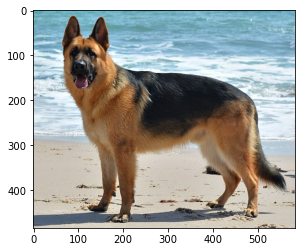

In [17]:
import matplotlib.pyplot as plt
plt.imshow(input_image)

In [18]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

print(input_batch.shape)

torch.Size([1, 3, 224, 224])


In [19]:
# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-8.7770e-02, -1.3655e+00, -3.9318e-01, -1.4255e+00, -8.2234e-01,
        -8.6616e-01, -2.5743e+00, -2.1052e+00, -1.8484e+00,  2.4362e-01,
        -8.9356e-01, -3.6951e+00, -3.3285e+00, -6.6079e-01, -4.9014e+00,
        -3.4915e+00, -3.3245e+00, -2.2302e+00, -3.2750e+00, -6.1225e-01,
        -4.5975e+00, -2.4344e+00, -5.2141e+00, -1.8037e+00, -4.2785e+00,
        -2.5093e+00, -1.0689e+00, -2.6248e+00, -2.0633e+00, -2.5709e+00,
        -1.0227e+00, -2.8457e+00, -9.8417e-01,  2.9557e+00,  1.4937e+00,
        -1.1293e+00, -2.0149e+00, -2.8957e+00, -1.5578e+00, -2.3524e+00,
        -2.0924e+00, -4.1386e+00, -3.9098e+00, -3.6149e+00, -2.3689e+00,
        -5.3210e-01, -2.9524e+00, -2.6979e+00, -5.0207e+00,  1.7532e-01,
         3.4132e-01, -7.7362e-02, -1.2225e+00, -2.2260e+00, -7.5670e-01,
        -3.0086e+00, -3.2422e+00, -2.2473e+00, -9.6908e-01, -2.7562e+00,
        -1.0562e+00, -1.6883e+00, -4.3744e-01, -1.7715e+00, -2.1840e+00,
         7.9242e-01, -1.6614e+00, -1.2722e+00, -3.2

C:\Users\aiguo\.conda\envs\{ECE398}\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [33]:
# Download ImageNet labels
!wget --no-check-certificate https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt


--2021-08-26 10:10:04--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt.3’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0.001s  

2021-08-26 10:10:04 (18.0 MB/s) - ‘imagenet_classes.txt.3’ saved [10472/10472]



In [21]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

231, collie 0.9991403818130493
159, Rhodesian_ridgeback 0.00035274471156299114
240, Appenzeller 0.00011128986079711467
251, dalmatian 9.788531315280125e-05
170, Irish_wolfhound 5.3455853048944846e-05


You will learn in later classes of this course what all this means. So don't worry if this looks like magic right now.

## Organizational Details

Let's check the **website** and **canvas**.

- Course materials are confidential. Do not share the materials outside the class. Do you make the materials publicly available. 
- Grading policy: 30% Homework; 30% Midterm; 40% Final
- Homework: 4 homework assignments throughout the semester
- Midterm: March 3 2022 during class (proctored on Zoom; attendance required)
- Final exam: May 3 2022 during class (proctored on Zoom; attendance required)
- Lectures: 
  * Week 1: On Zoom (https://illinois.zoom.us/j/81977216953?pwd=S3ppZ1BESnlYVUM1ZjE4cEdROVVYdz09)
  * The rest of the semester: Provide your preference if you have signed up for the in-person section:  https://www.surveymonkey.com/r/BQTYJKY
- Course website: https://courses.grainger.illinois.edu/ece398as/sp2022/